# Data Exploration with Python

## EXERCISE 1: Reading and accessing data

### Read the survey response data

The `csv` module supports reading and writing of files in comma-separated values (CSV) and similar formats. We use `DictReader` since the first row of our survey responses file is a header. This produces a list of dictionaries, one dictionary per each individual survey response. 

A _dictionary_ is a data structure in Python that can hold key-value pairs, where we can lookup values by their key. 

The `pprint` command below prints the dictionary corresponding the the first response.


In [457]:
import csv
import pprint
data = list(csv.DictReader(open('D:\\Documents\\36100\\DatasetSelection\\UTS 36100.csv',encoding="utf-8")))
pprint.pprint(data[0])

{'Communication': '5',
 'Data management': '5',
 'How many years professional experience do you have?': '1.5',
 'How many years programming experience do you have?': '0',
 'How would you define Data Science in one sentence?': 'Using data to make '
                                                       'informed business '
                                                       'decisions',
 'Machine Learning & Data Mining': '3',
 'Software Engineering': '3',
 'Statistics': '5',
 'Timestamp': '2024/08/02 11:35:53 AM GMT+10',
 'Visualisation': '5',
 'What industry would you like to go into?': 'Media and Communications',
 'What key experiences do you have?': 'Customer Relationship '
                                      'Management;Management',
 'What key skills do you want to develop?': 'Information Retrieval;Statistical '
                                            'Analysis;Visualisation;Customer '
                                            'Relationship '
                             

### Let's define constants for dictionary keys

Before moving on, let's define constants for the keys of this dictionary that will make it a bit easier to use. In our case, the keys are simply the questions from our survey in Week 1.

In [458]:
TIMESTAMP = 'Timestamp'
BACKGROUND_INDUSTRY = 'What main industry have you worked in?'
BACKGROUND_YEARS_PROFESSIONAL = 'How many years professional experience do you have?'
BACKGROUND_YEARS_PROGRAMMING = 'How many years programming experience do you have?'
BACKGROUND_SKILLS = 'What key experience do you have?'
IMPORT_DATA_MANAGEMENT = 'Data management'
IMPORT_STATISTICS = 'Statistics'
IMPORT_VISUALISATION = 'Visualisation'
IMPORT_MACHINE_LEARNING = 'Machine Learning & Data Mining'
IMPORT_SOFTWARE_ENGINEERING = 'Software Engineering'
IMPORT_COMMUNICATION = 'Communication'
GOALS_DEFINITION = 'How would you define Data Science in one sentence?'
GOALS_SKILLS = 'What key skills do you want to learn?'
GOALS_ROLE = 'What kind of role would you like to go into?'
GOALS_INDUSTRY = 'What industry would you like to go into?'
IMPORT_AREAS = [
    IMPORT_DATA_MANAGEMENT,
    IMPORT_STATISTICS,
    IMPORT_VISUALISATION,
    IMPORT_MACHINE_LEARNING,
    IMPORT_SOFTWARE_ENGINEERING,
    IMPORT_COMMUNICATION
]

### Accessing data values

This allows us to access cells in a row using the column name as a key. For example, the following prints the number of years professional experience for the first respondent. Note that the csv module reads all values as strings.

In [459]:
row = data[1]
row

{'Timestamp': '2024/08/02 6:04:15 PM GMT+10',
 'What main industry have you worked in?': 'Information Technology',
 'How many years professional experience do you have?': '0',
 'How many years programming experience do you have?': '2 years',
 'What key experiences do you have?': 'Relational databases;Visualisation;Machine learning;Natural Language Processing',
 'Data management': '5',
 'Statistics': '4',
 'Visualisation': '5',
 'Machine Learning & Data Mining': '5',
 'Software Engineering': '4',
 'Communication': '5',
 'How would you define Data Science in one sentence?': 'Data science is an enigma that needs to be explored.',
 'What key skills do you want to develop?': 'Relational databases;Statistical Analysis;Visualisation;Machine learning;Data mining;Natural Language Processing;Programming;Management;Requirements gathering;Ethics;Product-driven thinking',
 'What kind of role would you like to go into?': 'Data Engineer;Data Scientist;Analyst;Consultant;Product Management',
 'What in

In [460]:
# Row 0 corresponds to first respondent since arrays are 0-indexed
print("response:", row[BACKGROUND_YEARS_PROFESSIONAL]) # years of professional experience
print("type:", type(row[BACKGROUND_YEARS_PROFESSIONAL])) # csv 
print("response (converted):", float(row[BACKGROUND_YEARS_PROFESSIONAL])) # years of professional experience
print("type:", type(float(row[BACKGROUND_YEARS_PROFESSIONAL]))) # convert to float

response: 0
type: <class 'str'>
response (converted): 0.0
type: <class 'float'>


### TODO: What is the third respondent's rating for communication as integer value?

In [461]:
# TODO: replace the content of this cell with your Python solution
try: 
    value = row[BACKGROUND_YEARS_PROGRAMMING]
    if value is None or value == '':
        print("response: N/A")
    else:
        print("response: ", value)
        print("type: ", type(value))
        converted_value = float(value)
        print("response (converted): ", converted_value)
        print("type: ", type(converted_value))
except ValueError:
    print("Error: could not convert to float")



response:  2 years
type:  <class 'str'>
Error: could not convert to float


## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*


## EXERCISE 2: Frequency distribution and mode

### Counting data

`Counter` from the `collections` module is useful for quickly calculating frequencies. 

In [462]:
from collections import Counter

counts = Counter()
for row in data:
    counts[row[IMPORT_COMMUNICATION]] += 1

print("Distribution of communication importance ratings:")
for k, v in sorted(counts.items()):
    print('{}: {}'.format(k, v))

Distribution of communication importance ratings:
1: 1
2: 2
3: 13
4: 22
5: 51


### TODO: Calculate distribution of background and goal industries

In [463]:
# TODO: replace the content of this cell with your Python solution
for row in data:
    counts[row[BACKGROUND_INDUSTRY]] += 1

print("Distribution of background industry importance ratings:")
for k, v in sorted(counts.items()):
    print('{}: {}'.format(k, v))

Distribution of background industry importance ratings:
1: 1
2: 2
3: 13
4: 22
5: 51
Agriculture: 1
Consulting, Advisory and NGO: 1
Education and Training: 9
Environmental Science: 1
Financial and Insurance Services: 8
Information Technology: 44
Manufacturing: 4
Marketing Services : 1
Media and Communications: 6
Oil & Gas: 1
Oil and Gas: 1
Research in Chemistry: 1
Retail: 3
ScientiIc Research: 4
Utilities: 1
applied math: 1
no: 1
none: 1


### Calculating the mode

We can also use `Counter` to calculate the mode.

In [464]:
mode_counter = Counter()
for row in data:
    mode_counter[row[IMPORT_COMMUNICATION]] += 1
print("Communication mode:", mode_counter.most_common(1)[0][0])

Communication mode: 5


We probably will need to calculate the _mode_ more than once. It hence is a good idea to define this as our a local function which we can later call with different parameters, depending on which data we would like to calculate the mode for, and without the need to repeat all its code again and again.

In Python, one defines a local function with the **def** statement, followed by the function name and a list of arguments with which we can invoke a function later.

Our own 'mode' function is introduced and used as follows:

In [465]:
# defines a new 'mode' function
def mode(data, column_key):
    mode_counter = Counter()
    for row in data:
        mode_counter[row[column_key]] += 1
    return mode_counter.most_common(1)[0][0]

# example on how to use the 'mode' function



### TODO: Calculate the mode of background and goal industries

In [466]:
# TODO: replace the content of this cell with your Python solution
int(data[2][IMPORT_COMMUNICATION])

mode_background_industry = mode(data, BACKGROUND_INDUSTRY)
mode_goal_industry = mode(data, GOALS_INDUSTRY)
print("Mode background industry:", mode_background_industry)
print("Mode goal industry:", mode_goal_industry )

Mode background industry: Information Technology
Mode goal industry: Information Technology


## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*


## EXERCISE 3: Calculating descriptive statistics

### Cleaning float data

Which columns contained ratio data? We need to convert these to numeric types. Let's define another function since we have two ratio variables. Here we replace values that can't be converted with NaN (not a number).

In [467]:
import numpy as np
DEFAULT_VALUE = np.nan

def clean(data, column_key, convert_function, default_value):
    special_values= {'3 years':3.0,'1 year' : 1.0, '2years' : 2.0, '2 years': 2.0, 'Ten' : 10, 'Half a year': 0.5, '6 months': 0.5, '6MONTHS': 0.5, '3 Months': 0.25, '1 month': 1/12}
    for row in data:
        old_value = row[column_key]
        new_value = default_value
        try:
            if old_value in special_values.keys():
                new_value = special_values[old_value]
            else:
                new_value = convert_function(old_value)
        except (ValueError, TypeError):
            print('Replacing {} with {} in column {}'.format(row[column_key], new_value, column_key))
        row[column_key] = new_value

clean(data, BACKGROUND_YEARS_PROFESSIONAL, float, DEFAULT_VALUE)
clean(data, BACKGROUND_YEARS_PROGRAMMING,  float, DEFAULT_VALUE)

Replacing 4 years with nan in column How many years professional experience do you have?
Replacing 1.5 years with nan in column How many years professional experience do you have?
Replacing no with nan in column How many years professional experience do you have?
Replacing <1 with nan in column How many years professional experience do you have?
Replacing 0,5 with nan in column How many years professional experience do you have?
Replacing 9 months with nan in column How many years professional experience do you have?
Replacing 0-1 with nan in column How many years professional experience do you have?
Replacing 3 months with nan in column How many years professional experience do you have?
Replacing 4 year with nan in column How many years professional experience do you have?
Replacing 6 years with nan in column How many years professional experience do you have?
Replacing 3 months with nan in column How many years professional experience do you have?
Replacing 0 years with nan in colum

### Cleaning timestamp data

We may also want to convert timestamp values.

In [468]:
data[0][TIMESTAMP]

'2024/08/02 11:35:53 AM GMT+10'

In [469]:
from datetime import datetime

FMT = "%m/%d/%Y %H:%M:%S"

def str_to_time(s):
    if isinstance(s, datetime):
        return s
    return datetime.strptime(s, FMT)

clean(data, TIMESTAMP, str_to_time, DEFAULT_VALUE)

Replacing 2024/08/02 11:35:53 AM GMT+10 with nan in column Timestamp
Replacing 2024/08/02 6:04:15 PM GMT+10 with nan in column Timestamp
Replacing 2024/08/03 1:56:48 AM GMT+10 with nan in column Timestamp
Replacing 2024/08/03 10:08:48 AM GMT+10 with nan in column Timestamp
Replacing 2024/08/03 11:01:47 AM GMT+10 with nan in column Timestamp
Replacing 2024/08/03 11:50:05 AM GMT+10 with nan in column Timestamp
Replacing 2024/08/03 3:25:07 PM GMT+10 with nan in column Timestamp
Replacing 2024/08/03 3:50:55 PM GMT+10 with nan in column Timestamp
Replacing 2024/08/04 2:39:19 PM GMT+10 with nan in column Timestamp
Replacing 2024/08/04 5:40:17 PM GMT+10 with nan in column Timestamp
Replacing 2024/08/04 5:43:29 PM GMT+10 with nan in column Timestamp
Replacing 2024/08/04 7:23:24 PM GMT+10 with nan in column Timestamp
Replacing 2024/08/05 1:08:48 AM GMT+10 with nan in column Timestamp
Replacing 2024/08/05 3:43:08 PM GMT+10 with nan in column Timestamp
Replacing 2024/08/05 4:23:29 PM GMT+10 with 

In [470]:
data[0][TIMESTAMP]

nan

### Statistics with `numpy`

Once the data is converted, we can calculate descriptive statistics. `numpy` includes routines for measures of centrality and dispersion. Below we calculate descriptive statistics for professional and programming experience.

Further detail: http://docs.scipy.org/doc/numpy/reference/routines.statistics.html

In [471]:
import numpy as np
for column_key in [BACKGROUND_YEARS_PROFESSIONAL, BACKGROUND_YEARS_PROGRAMMING]:
    v = [row[column_key] for row in data] # grab values
    print(column_key.upper())
    print("* Min..Max: {}..{}".format(np.nanmin(v), np.nanmax(v)))
    print("* Range: {}".format(np.nanmax(v)-np.nanmin(v)))
    print("* Mean: {}".format(np.nanmean(v)))
    print("* Standard deviation: {}".format(np.nanstd(v)))
    print("* Median: {}".format(np.nanmedian(v)))
    q1 = np.nanpercentile(v, 25)
    print("* 25th percentile (Q1): {}".format(q1))
    q3 = np.nanpercentile(v, 75)
    print("* 75th percentile (Q3): {}".format(q3))
    iqr = q3-q1
    print("* IQR: {}".format(iqr))

HOW MANY YEARS PROFESSIONAL EXPERIENCE DO YOU HAVE?
* Min..Max: 0.0..20.0
* Range: 20.0
* Mean: 2.6739130434782608
* Standard deviation: 3.5527353076681085
* Median: 2.0
* 25th percentile (Q1): 1.0
* 75th percentile (Q3): 3.0
* IQR: 2.0
HOW MANY YEARS PROGRAMMING EXPERIENCE DO YOU HAVE?
* Min..Max: 0.0..15.0
* Range: 15.0
* Mean: 2.2697368421052633
* Standard deviation: 2.7415429643696565
* Median: 2.0
* 25th percentile (Q1): 0.0
* 75th percentile (Q3): 3.0
* IQR: 3.0


### Binning and histograms

`numpy` also provides routines for binning and producing histograms from ratio data.

NOTE RuntimeWarning due to NaN values, which are then ignored in histogram.

In [472]:
v = []
for row in data:
    v.append(row[BACKGROUND_YEARS_PROFESSIONAL])

freqs, bins = np.histogram(v, bins=7, range=(0,35)) # calculate frequencies and bin start/end
for i, freq in enumerate(freqs):
    # Note that bins[i] <= bin_values < bins[i+1]
    bin_str = '[{}..{}]'.format(int(bins[i]), int(bins[i+1]))
    print(bin_str, ':', freq)

[0..5] : 57
[5..10] : 8
[10..15] : 2
[15..20] : 1
[20..25] : 1
[25..30] : 0
[30..35] : 0


### TODO: Calculate histogram for programming experience

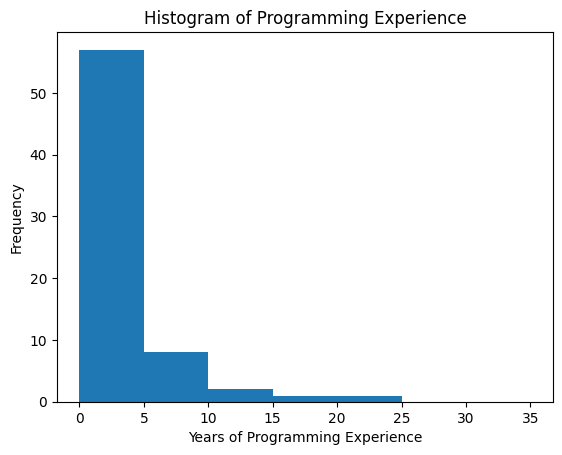

In [473]:
# TODO: replace the content of this cell with your Python solution
import matplotlib.pyplot as plt

plt.hist(v, bins=bins, range=(int(bins[i]), int(bins[i+1])))
plt.xlabel('Years of Programming Experience')
plt.ylabel('Frequency')
plt.title('Histogram of Programming Experience')
plt.show()


### EXTRA Calculate histograms with bin size of 2

In [474]:
# TODO: replace the content of this cell with your Python solution
bin_size = 2
num_bins =  int(np.nanmax(v)-np.nanmin(v))// bin_size
freqs, bins = np.histogram(v, bins = num_bins, range=(np.nanmin(v),np.nanmax(v))) # calculate frequencies and bin start/end
for i, freq in enumerate(freqs):
    # Note that bins[i] <= bin_values < bins[i+1]
    bin_str = '[{}..{}]'.format(int(bins[i]), int(bins[i+1]))
    print(bin_str, ':', freq)

[0..2] : 33
[2..4] : 23
[4..6] : 4
[6..8] : 3
[8..10] : 2
[10..12] : 2
[12..14] : 0
[14..16] : 0
[16..18] : 1
[18..20] : 1


## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*


 ## EXERCISE 4: Visualisation with matplotlib

### Making a bar chart

`matplotlib` provides functionality for creating various plots. Let's start with a frequency polygon. Note the line `%matplotlib inline` in is important in Jupyter.

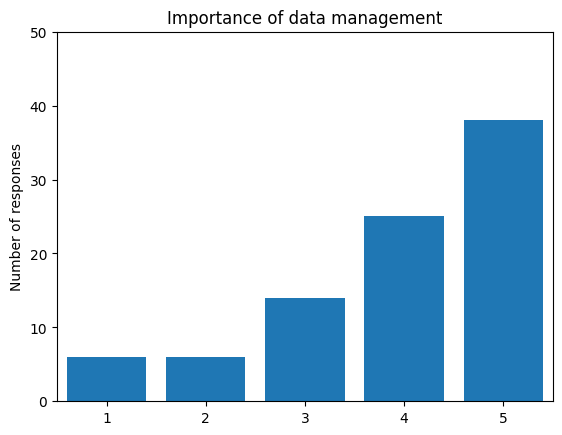

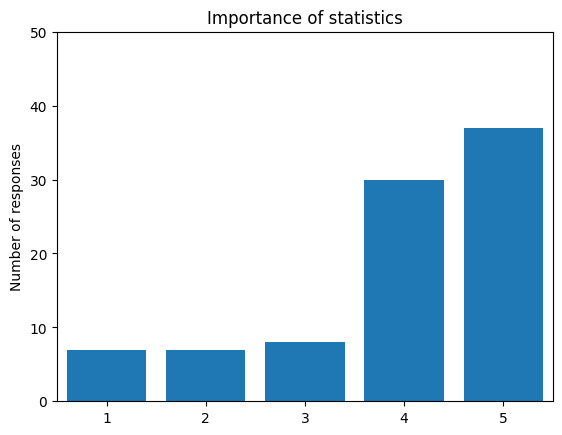

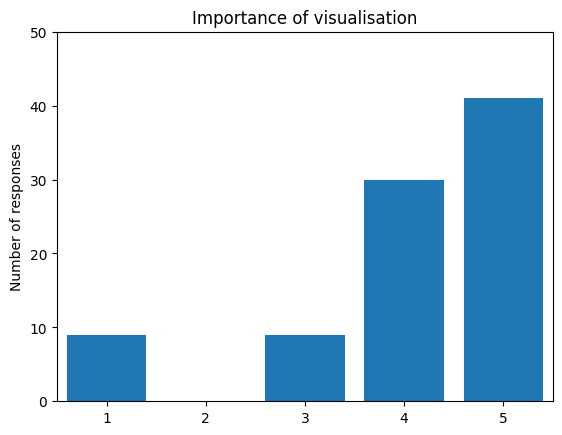

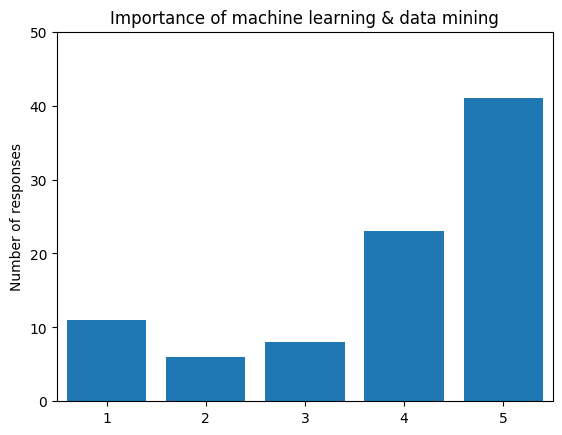

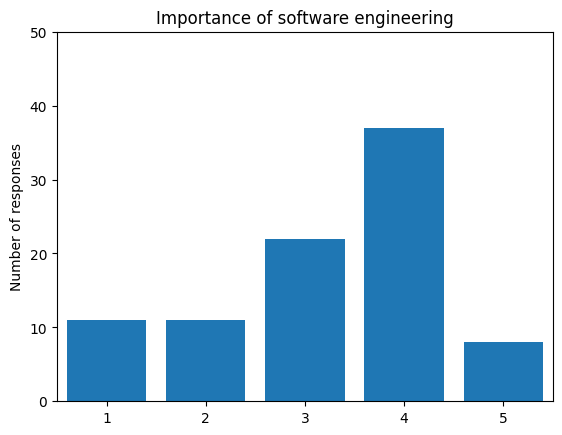

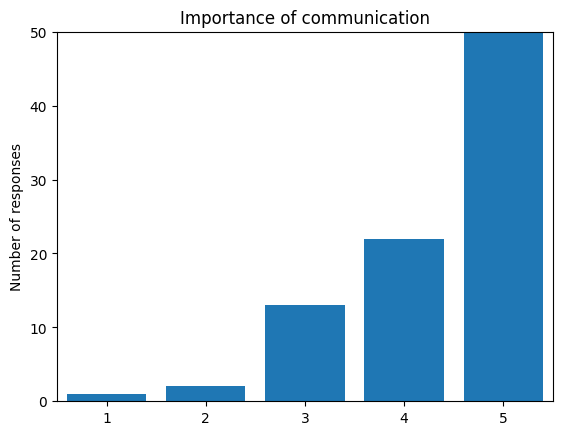

In [475]:
import matplotlib.pyplot as plt
from collections import OrderedDict
# IMPORT_KEYS = ['1', '2', '3', '4', '5']
# IMPORT_KEYS_2 = ['1', '3', '5', '7', '9']
def make_importance_plot(data, column_key, title):
    c = Counter(row[column_key] for row in data)
    d = OrderedDict([(k,c[k]) if k in c else (k,0) for k in IMPORT_KEYS])
    # bars are by default width 0.8, so we'll add 0.1 to the left coordinates
    xs = [i+0.5 for i,_ in enumerate(IMPORT_KEYS)]
    plt.bar(xs, d.values())
    plt.ylabel('Number of responses')
    plt.axis([0,5,0,50])
    plt.title(title)
    plt.xticks([i+0.5  for i, _ in enumerate(IMPORT_KEYS)], IMPORT_KEYS)
    plt.show()
for a in IMPORT_AREAS:
    title = 'Importance of {}'.format(a.lower())
    make_importance_plot(data, a, title)

### TODO: Make bar charts of known and future industries

In [476]:
background_industries = set(row[BACKGROUND_INDUSTRY] for row in data)
print(background_industries)

{'Marketing Services ', 'Retail', 'none', 'Financial and Insurance Services', 'Research in Chemistry', 'Oil & Gas', 'ScientiIc Research', 'Information Technology', 'Utilities', 'Manufacturing', 'Education and Training', 'Environmental Science', 'applied math', 'no', 'Consulting, Advisory and NGO', 'Agriculture', 'Oil and Gas', 'Media and Communications'}


['Education and Training', 'Information Technology', 'Financial and Insurance Services', 'Financial and Insurance Services', 'ScientiIc Research', 'Information Technology', 'Financial and Insurance Services', 'Research in Chemistry', 'Media and Communications', 'Financial and Insurance Services', 'Education and Training', 'Consulting, Advisory and NGO', 'Information Technology', 'Information Technology', 'Education and Training', 'ScientiIc Research', 'Information Technology', 'Education and Training', 'Environmental Science', 'Manufacturing', 'Media and Communications', 'Agriculture', 'Manufacturing', 'Information Technology', 'Information Technology', 'Information Technology', 'Information Technology', 'Manufacturing', 'Information Technology', 'Information Technology', 'Information Technology', 'Education and Training', 'Information Technology', 'Information Technology', 'Information Technology', 'no', 'Information Technology', 'Manufacturing', 'Information Technology', 'Financial a

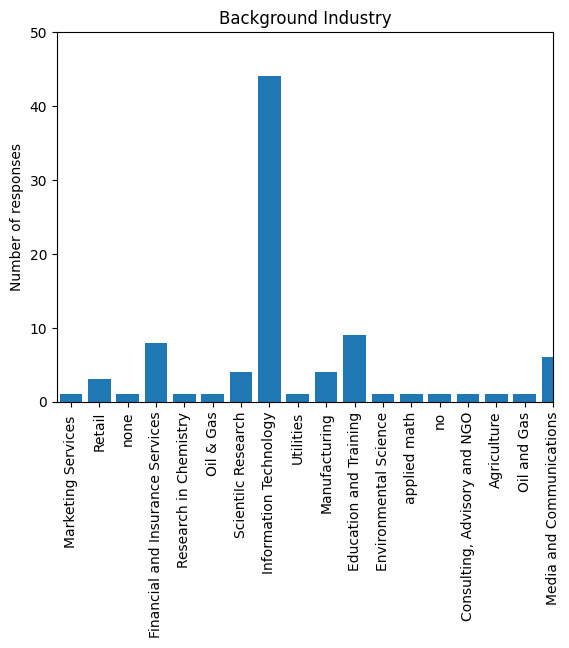

In [477]:
# TODO: replace the content of this cell with your Python solution
background_industry = [row[BACKGROUND_INDUSTRY] for row in data]
print(background_industry)
def make_importance_plot(data, column_key, title, keys):
    c = Counter(row[column_key] for row in data)
    d = OrderedDict([(k,c[k]) if k in c else (k,0) for k in keys])
    # bars are by default width 0.8, so we'll add 0.1 to the left coordinates
    xs = [i+0.5 for i,_ in enumerate(keys)]
    plt.bar(xs, d.values())
    plt.ylabel('Number of responses')
    plt.axis([0,5,0,50])
    plt.title(title)
    plt.xticks([i+0.5  for i, _ in enumerate(keys)], keys, rotation=90)
    plt.show()
    
make_importance_plot(data, BACKGROUND_INDUSTRY, "Background Industry", background_industries)

{'Data Engineer;Data Scientist;Analyst;(Applied) Statistician', 'TBA', 'Data Engineer;Consultant;Product Management', 'Data Engineer;Data Scientist;Data Architect;Consultant;Software Engineer', 'Data Scientist;Analyst;Product Management;Research', 'Data Engineer;Data Scientist;Data Architect;Analyst;Software Engineer', 'Data Engineer;Data Scientist;Consultant', 'Data Engineer;Data Scientist;Data Architect;Analyst;Consultant;Software Engineer;Research', 'Data Scientist;Analyst;Consultant;Product Management', 'Data Scientist', 'Synthesis Chemist solid structure Chemistry', 'Data Engineer;Data Scientist;Data Architect;Analyst;(Applied) Statistician;Quantitative Analyst;Actuary;Consultant;Software Engineer;Research', 'Data Engineer;Analyst;Quantitative Analyst;Consultant', 'Data Scientist;Data Architect;Analyst', 'Data Engineer;Data Scientist;Quantitative Analyst', 'Data Engineer;Data Scientist;Analyst;Product Management', 'Data Engineer;Data Scientist;Quantitative Analyst;Research', 'Data

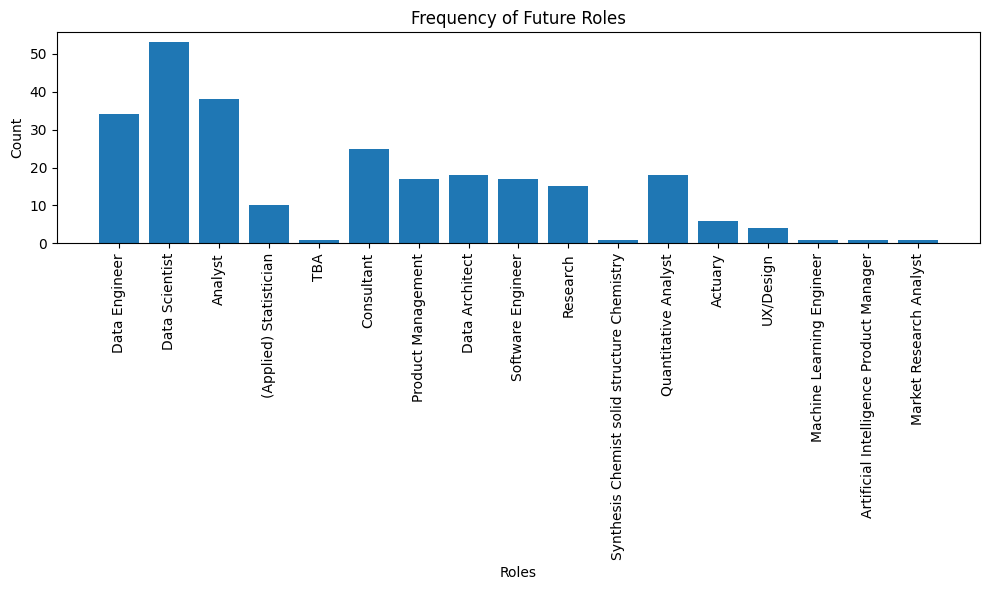

In [478]:
future_roles = set(row[GOALS_ROLE] for row in data)
print(future_roles)
all_roles = []
for row in future_roles:
    roles = row.split(';')
    all_roles.extend(role.strip() for role in roles)
role_counts = Counter(all_roles)

for role, count in role_counts.items():
    print(role, count)


# Prepare data for plotting
roles = list(role_counts.keys())
counts = list(role_counts.values())

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(roles, counts)
plt.xlabel('Roles')
plt.ylabel('Count')
plt.title('Frequency of Future Roles')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

### Making a histogram

Now let's use the `histogram` from `numpy` above to create a histograms of professional and programming experience.

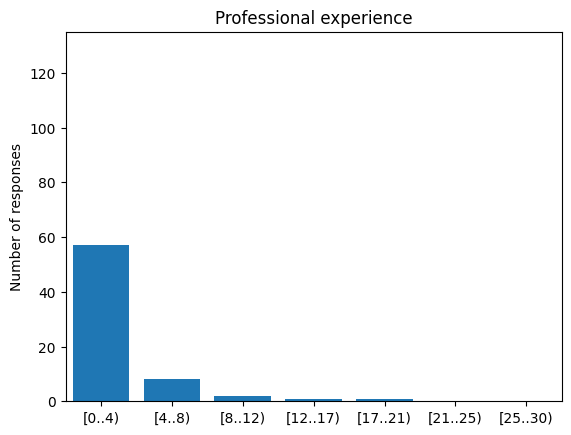

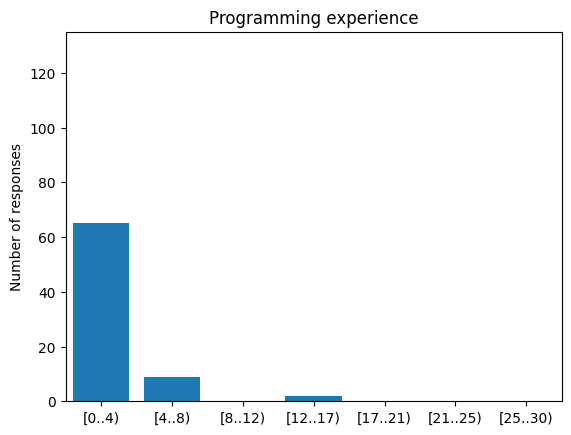

In [479]:
def iter_histogram(data, column_key):
    v = [row[column_key] for row in data] # grab values
    freqs, bins = np.histogram(v, bins=7, range=(0,30))
    for i, freq in enumerate(freqs):
        yield ('[{}..{})'.format(int(bins[i]), int(bins[i+1])), freq)
        
def make_histogram_plot(data, column_key, title):
    d = OrderedDict(iter_histogram(data, column_key))
    keys = list(d.keys())
    xs = [i+0.5 for i,_ in enumerate(keys)]
    plt.bar(xs, d.values())
    plt.ylabel('Number of responses')
    plt.axis([0,7,0,135])
    plt.title(title)
    plt.xticks([i + 0.5 for i, _ in enumerate(keys)], keys)
    plt.show()
    
make_histogram_plot(data, BACKGROUND_YEARS_PROFESSIONAL, 'Professional experience')
make_histogram_plot(data, BACKGROUND_YEARS_PROGRAMMING, 'Programming experience')

### Making a scatterplot

Finally, let's make a scatterplot to compare professional and programming experience.

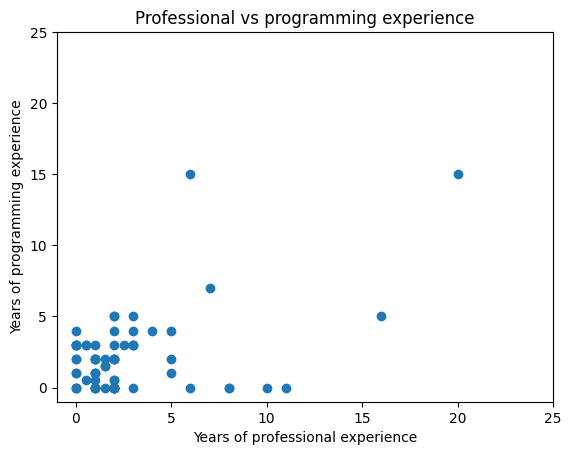

In [480]:
professional_experience = [row[BACKGROUND_YEARS_PROFESSIONAL] for row in data]
programming_experience = [row[BACKGROUND_YEARS_PROGRAMMING] for row in data]
plt.scatter(professional_experience, programming_experience)
plt.title('Professional vs programming experience')
plt.xlabel('Years of professional experience')
plt.ylabel('Years of programming experience')
plt.axis([-1,25,-1,25])
plt.show()

## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*


## EXERCISE 5: Box plots and correlation

### Visualising distributions with box plots

Mean and standard deviation are not informative for skewed data. `boxplot` is is a good visualisation for viewing and comparing distributions. It also shows outliers, e.g., values greater than `Q3+1.5*IQR` or less than `Q1-1.5*IQR`.

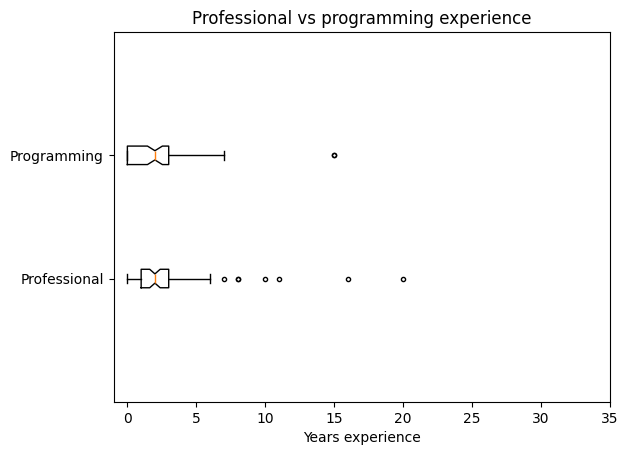

In [481]:
professional_experience = [v for v in professional_experience if v is not np.nan]
programming_experience = [v for v in programming_experience if v is not np.nan]
plt.boxplot([professional_experience, programming_experience], 
            vert=False, notch=True, flierprops={'marker':'.'})
plt.axis([-1,35,0,3])
plt.yticks([1,2], ['Professional', 'Programming'])
plt.xlabel('Years experience')
plt.title('Professional vs programming experience')
plt.show()

### Calculating correlation between two variables

Pearson's r is the covariance of the two variables divided by the product of their standard deviations. Spearman rho is a common nonparametric test that is used in stead of Pearson's r when 

In [482]:
from scipy import stats
# only keep rows where both professional and programming experience are defined
prof, prog = [], []
for row in data:
    if row[BACKGROUND_YEARS_PROFESSIONAL] is np.nan:
        continue # ignore rows with no value for professional experience
    elif row[BACKGROUND_YEARS_PROGRAMMING] is np.nan:
        continue # ignore rows with no value for programming experience
    else:
        prof.append(row[BACKGROUND_YEARS_PROFESSIONAL])
        prog.append(row[BACKGROUND_YEARS_PROGRAMMING])
print("Pearson (r, p): {}".format(stats.pearsonr(prof, prog)))

print(stats.spearmanr(prof, prog))

Pearson (r, p): PearsonRResult(statistic=0.4574377943509774, pvalue=8.789777736079317e-05)
SignificanceResult(statistic=0.12694451816688485, pvalue=0.30226693781863423)


Calculate Kendall's tau between importance ratings

In [483]:
print('{:.2f}'.format(3.14159))
for i,k1 in enumerate(IMPORT_AREAS):
    print(k1)
    v1 = [r[k1] for r in data]
    for j in range(i+1,len(IMPORT_AREAS),1):
        k2 = IMPORT_AREAS[j]
        v2 = [r[k2] for r in data]
        tau = stats.kendalltau(v1, v2)
        print('* {:5.2f} (p={:.3f}): {}'.format(tau.correlation, tau.pvalue, k2))

3.14
Data management
*  0.65 (p=0.000): Statistics
*  0.66 (p=0.000): Visualisation
*  0.55 (p=0.000): Machine Learning & Data Mining
*  0.51 (p=0.000): Software Engineering
*  0.28 (p=0.003): Communication
Statistics
*  0.55 (p=0.000): Visualisation
*  0.71 (p=0.000): Machine Learning & Data Mining
*  0.50 (p=0.000): Software Engineering
*  0.41 (p=0.000): Communication
Visualisation
*  0.45 (p=0.000): Machine Learning & Data Mining
*  0.45 (p=0.000): Software Engineering
*  0.40 (p=0.000): Communication
Machine Learning & Data Mining
*  0.47 (p=0.000): Software Engineering
*  0.30 (p=0.001): Communication
Software Engineering
*  0.24 (p=0.011): Communication
Communication
